In [5]:
from fastai.vision.all import *

In [6]:
path = untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('C:/Users/hecto/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/hecto/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
(path/"images").ls()

(#7393) [Path('C:/Users/hecto/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/hecto/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/hecto/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/hecto/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat'),Path('C:/Users/hecto/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/hecto/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.mat'),Path('C:/Users/hecto/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/hecto/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.mat'),Path('C:/Users/hecto/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/hecto/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg')...]

In [ ]:
fname = (path/"images").ls()[0]

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Abyssinian']

In [ ]:
## Etiquetar el dataset completo con regex en la construcción del dataset

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
         get_items=get_image_files,
         splitter=RandomSplitter(valid_pct=0.2, seed=42),
         get_y=RegexLabeller(r'(.+)_\d+.jpg$', 'name'),
         item_tfms=Resize(460),
         batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders(path/"images")

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\hecto\Anaconda23\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [ ]:
## Vistazo a como se ven los datos y a sus respectivas etiquetas

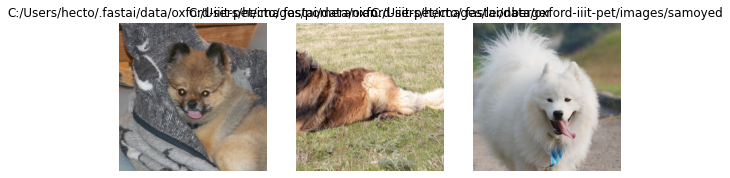

In [ ]:
dls.show_batch(nrows=1, ncols=3)

In [ ]:
## Problema con las etiquetas. La expresión regular no descarta el path
### Debería etiquetar bien ya que en la función correspondiente se le indica el atributo 'name'
### ¿versión de fastai?
re.findall(r'(.+)_\d+.jpg$', 'data\oxford-iiit-pet\images\saint_bernard_138.jpg')

['data\\oxford-iiit-pet\\images\\saint_bernard']

In [ ]:
## Comprobar y debuggear un DataBlock por si se hubiera cometido algún error en su construcción
### De esta forma se garantiza que la plantilla va a funcionar en los datos.

In [ ]:
pets1 = DataBlock(blocks=(ImageBlock, CategoryBlock),
         get_items=get_image_files,
         splitter=RandomSplitter(valid_pct=0.2, seed=42),
         get_y=RegexLabeller(r'(.+)_\d+.jpg$', 'name'))

pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\hecto\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\hecto\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying RegexLabeller gives
      C:/Users/hecto/.fastai/data/oxford-iiit-pet/images/saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipel

RuntimeError: stack expects each tensor to be equal size, but got [3, 375, 500] at entry 0 and [3, 199, 300] at entry 1

In [ ]:
### En el summary también se puede apreciar que etiqueta con la ruta

In [ ]:
pets2 = DataBlock(blocks=(ImageBlock, CategoryBlock),
         get_items=get_image_files,
         splitter=RandomSplitter(valid_pct=0.2, seed=42),
         get_y=RegexLabeller(r'(.+)_\d+.jpg$', 'name'),
         item_tfms=Resize(460),
         batch_tfms=aug_transforms(size=224, min_scale=0.75))

pets2.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\hecto\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\hecto\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying RegexLabeller gives
      C:/Users/hecto/.fastai/data/oxford-iiit-pet/images/saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipel

In [7]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
         get_items=get_image_files,
         splitter=RandomSplitter(valid_pct=0.2, seed=42),
         get_y=lambda x: RegexLabeller(r'(.+)_\d+.jpg$')(x.name),
         item_tfms=Resize(460),
         batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders(path/"images")

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


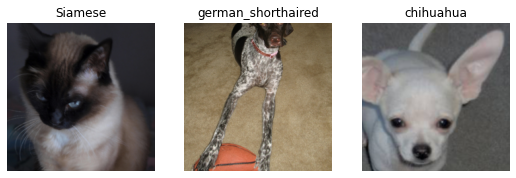

In [ ]:
dls.show_batch(nrows=1, ncols=3)

In [ ]:
## Estrategia Presizing
## ----------------------

## Una cosa a destacar en el DataBlock es la estrategia que se sigue en fastai para abordar el preprocesamiento de las imágenes
## y las transformaciones resultantes de Data Augmentation. Dicha estrategia consiste en realizar en primer lugar un cropeo
## aleatorio a cada una de las imágenes con un tamaño relativamente mas grande que el tamaño que tendrán a posteriori las
## imágenes para realizar el entrenamiento. La motivación de este redimensionado inicial es para evitar zonas vacías y/o datos
## degradados como consecuencia de las transformaciones posteriores (rotación, ampliación, interpolación, redimensionado, etc) y
## de las cuales el modelo no aprenderá nada y empeorará su eficiencia por los cálculos correspondientes. Esto junto a la
## realización conjunta de todas las operaciones de transformación (incluido el redimensionado) en la GPU permite obtener
## imágenes de mejor calidad (Esto permite realizar las transformaciones, rotación, ampliación, etc y luego aplicar la interpolación,
## en lugar de aplicar rotación-->interpolación-->ampliación-->interpolación-->etc)
## En la práctica mejora significativamente la accuracy de los modelos y a menudo son más rápidos.

In [ ]:
## Verificar que tal funcionan los datos con un modelo mas simple lo anes posible.
### Quizá no sea neceario aplicar mucha ingenieria de dominio específico, los datos no estén entrenando el modelo o quizá con
### un modelo mas simple se obtiene un buen rendimiento.

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.485556,0.292283,0.093369,31:44


epoch,train_loss,valid_loss,error_rate,time
0,0.494020,0.327026,0.100812,36:57
1,0.342769,0.206330,0.064276,36:50


In [ ]:
## fastai intentará seleccionar una función de perdida apropiada según el tipo de datos y el modelo que se está usando.
## en este caso, al tener imágenes como entrada y salidas categóricas, fastai usará por defecto cross entropy loss

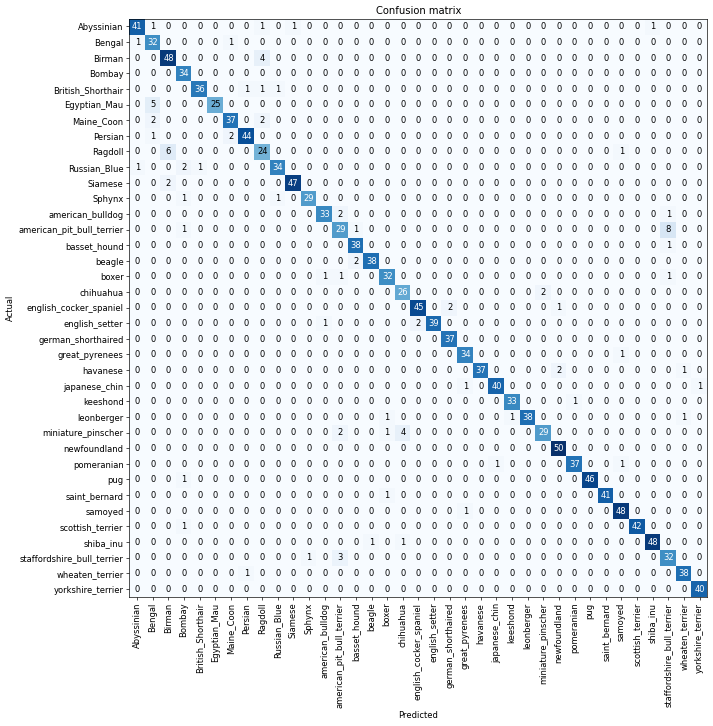

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
## Muestra las celdas de la matriz de confusión con las mayores predicciones incorrectas
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Ragdoll', 'Birman', 6),
 ('Egyptian_Mau', 'Bengal', 5)]

In [ ]:
learn.export()

PicklingError: Can't pickle <function <lambda> at 0x000001F7BF8AB948>: attribute lookup <lambda> on __main__ failed

In [ ]:
import dill
torch.save(
    obj=learn,
    f='breed_pets.pkl',
    pickle_module=dill
)

### Algunas pruebas con la función de pérdida

In [ ]:
## Método que permite ver datos del DataLoaders
x,y = dls.one_batch()

In [ ]:
x.shape, y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [ ]:
preds,_ = learn.get_preds(dl=[(x,y)])

In [ ]:
preds[0]

TensorBase([2.8062e-07, 3.9852e-08, 5.1684e-08, 1.6519e-05, 9.9954e-01, 4.0361e-06,
        7.4008e-06, 2.9074e-05, 2.4777e-07, 3.9459e-04, 5.3159e-08, 2.2171e-09,
        2.6449e-09, 1.4906e-08, 2.2927e-08, 7.9541e-09, 4.4948e-07, 5.2670e-08,
        5.6842e-09, 1.5016e-08, 7.4800e-08, 2.3441e-08, 3.6953e-09, 7.6785e-09,
        1.7906e-07, 1.2688e-07, 6.3064e-09, 3.2393e-06, 6.0313e-08, 5.0731e-07,
        8.7405e-08, 2.4842e-07, 8.0213e-08, 3.6419e-08, 9.3394e-08, 6.8990e-08,
        9.2002e-09])

In [ ]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.0000))

In [ ]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

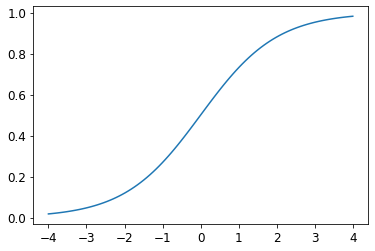

In [ ]:
plot_function(torch.sigmoid, min=-4,max=4)

In [ ]:
acts = torch.randn((6,2))*2
acts

tensor([[ 2.2206, -3.3796],
        [-1.9779,  1.9159],
        [ 2.6443,  1.6344],
        [-1.5317, -1.5012],
        [ 2.7051,  1.3726],
        [-0.6555,  1.5899]])

In [ ]:
acts.sigmoid()

tensor([[0.9021, 0.0329],
        [0.1215, 0.8717],
        [0.9337, 0.8368],
        [0.1777, 0.1822],
        [0.9373, 0.7978],
        [0.3417, 0.8306]])

In [ ]:
# las filas no suman 1
acts.sigmoid().sum(1)

tensor([0.9350, 0.9932, 1.7704, 0.3600, 1.7351, 1.1724])

In [ ]:
acts[:,0]-acts[:,1]

tensor([ 5.6002, -3.8939,  1.0099, -0.0304,  1.3325, -2.2455])

In [ ]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.9963, 0.0200, 0.7330, 0.4924, 0.7912, 0.0957])

In [ ]:
1-(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.0037, 0.9800, 0.2670, 0.5076, 0.2088, 0.9043])

In [ ]:
import math
def softmax(x): return math.exp(x) / math.exp(x).sum(dim=1, keepdim=True)

In [ ]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.9963, 0.0037],
        [0.0200, 0.9800],
        [0.7330, 0.2670],
        [0.4924, 0.5076],
        [0.7912, 0.2088],
        [0.0957, 0.9043]])

In [ ]:
targ = tensor([0,1,0,1,1,0])

In [ ]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.9963, 0.9800, 0.7330, 0.5076, 0.2088, 0.0957])

In [ ]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.9963, -0.9800, -0.7330, -0.5076, -0.2088, -0.0957])

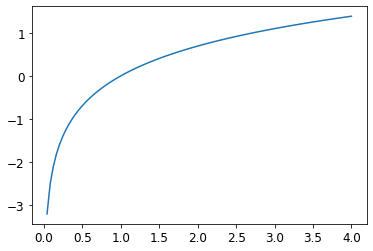

In [ ]:
plot_function(torch.log, min=0,max=4)

### Mejora del modelo

Transfer Learning, cómo realizar el ajuste fino del modelo preentranado lo mejor posible sin 'romper' los pesos preentrenados

- Learning rate
- Ajuste fino de los parámetros del modelo preentrenado
- Número de épocas
- Arquitecturas más profundas

In [ ]:
## Learning rate finder
## ---------------------
### Buscador de la tasa de aprendizaje adecuada

## Consiste en entrenar el modelo durante una época, con un learning rate muy pequeño y con mini lotes. En cada paso de época
## realizar seguimiento de la loss e incrementar el learning rate en un cierto porcentaje. En el momento de que el loss empeore
## es el punto en el que ya no es un valor de learning rate adecuado.

## Lo más adecuado es escoger un learning rate un poco más pequeño que el valor del punto crítico por dos motivos:
### Es el limite el que un valor un poco mas alto hace explotar el loss, por lo que mejor asegurar con un valor algo más pequeño
### y tampoco habrá mucha diferencia.

### Si se está utilizando un optimizador con momentum (ej. Adam), el loss en cada iteración es un promedio del minilote actual y
### los minilotes anteriores.Esto repercute en que cuando el valor del learning rate es demasiado grande, el loss no explotará
### inmediatamente ya que los pequeños losses anteriores harán que el promedio del loss actual sea mas reducido. Por tanto,
### cuando la curva se dispara el learning rate ya ha sido grande durante algún tiempo.

## Escoger el learning rate con un orden de magnitud menor que el punto crítico o el último punto donde el loss fue claramente
## descendente.

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.593507,5.485852,0.469553,43:49


epoch,train_loss,valid_loss,error_rate,time
0,3.988409,3.088505,0.780785,39:41


ValueError: not enough values to unpack (expected 2, got 1)

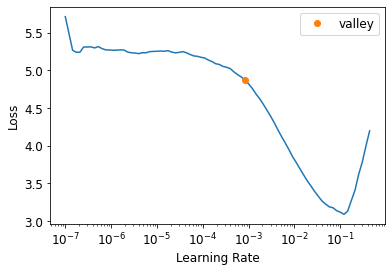

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find()

In [ ]:
## En esta versión se marca un orden de magnitud adecuado (10-3). Dado que el punto mínimo se alcanza en un orden de magnitud
## cercano a 10-1, podría valer algún valor de learning rate en las proximidades de 10-2 (inferior)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.297454,0.323255,0.107578,30:12


epoch,train_loss,valid_loss,error_rate,time
0,0.555074,0.372011,0.121786,47:37
1,0.330199,0.232325,0.075101,44:00


In [ ]:
## Descongelar parámetros y transfer learning
### El hecho de realizar el ajuste fino cambiando la capa del final del modelo por una capa adecuada a la nueva tarea, introduce
### pesos aleatorios y por tanto, genera salidas aleatorias. Interesa que el modelo preentrenado recuerde los conceptos mas
### simples y complejos aprendidos en las capas anteriores por lo que es necesario congelar los pesos en dichas capas.

## fastai automáticamente congela todos los pesos de las capas preentrenadas. Con el método fine_tune fastai hace dos cosas:
## - Entrena los pesos aleatorios de la capa cambiada durante una época, con el resto de pesos congelados.
## - Descongela todas las capas y se entrenan durante el número de épocas indicado.
## (Ver entranmientos anteriores donde aparecen dos tablas)

In [ ]:
## fine_tune tiene parámetros que permiten cambiar su comportamiento y mejorar los resultados. Sin embargo, es más fácil usar
## otros métodos como fit_one_cycle si se quiere un comportamiento personalizado.

In [8]:
## Solo entrena los pesos relacionados con la capa añadida. No descongela el resto de pesos
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.189739,0.376872,0.112991,01:33
1,0.516197,0.305531,0.090663,01:33
2,0.343098,0.248803,0.082544,01:34


In [9]:
# descongelar
learn.unfreeze()

SuggestedLRs(valley=3.630780702224001e-05)

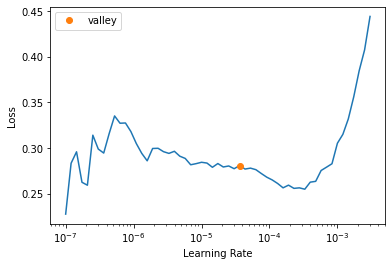

In [10]:
## Encontrar de nuevo el lr adecuado porque ha cambiado la última capa del modelo y además ya ha sido entrenado durante 3 epochs
learn.lr_find()

In [11]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.237769,0.244348,0.081191,01:54
1,0.229147,0.234369,0.078484,01:49
2,0.222608,0.231527,0.077131,01:41
3,0.200235,0.226268,0.075778,01:41
4,0.187434,0.225633,0.073748,01:41
5,0.172186,0.222672,0.072395,01:40


In [12]:
## Learning rates discriminativos

## Descongelar el resto de capas mejora el modelo pero se puede seguir otra técnica adicional para mejorar los resultados. 
## La idea es que las capas del modelo preentranado no tienen porque tener el mismo learning rate. Tiene sentido mantener 
## los pesos de las primeras capas de la red ya que aprenden conceptos mas generales o básicos (ej. bordes, etc) y por tanto 
## éstas tengan learning rates mas pequeños (entrena mas lento y por tanto los pesos sufren cambios mas pequeños). Sin embargo, 
## las capas mas profundas aprenden conceptos más específicos (ej. ojos, ruedas, etc) y por tanto no es tan necesario conservar 
## el conocimiento adquirido en el modelo preentrenado. Unos valores más altos serían adecuados para estas capas. Otra forma de 
## verlo es en relacion al desvanecimiento del gradiente en las primeras capas en redes muy profundas, motivo por el cual éstas 
## apenas aprenden y ralentiza la convergencia del loss. La asignación de learning rates más altos en las últimas capas compensa 
## la 'lentitud' de las primeras capas y acelera la convergencia final.

In [13]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.145560,0.317248,0.096752,01:34
1,0.547953,0.291969,0.098782,01:33
2,0.348178,0.243490,0.076455,01:34


epoch,train_loss,valid_loss,error_rate,time
0,0.287110,0.231013,0.072395,01:41
1,0.242809,0.226062,0.074425,01:40
2,0.229197,0.225045,0.068336,01:40
3,0.207789,0.219885,0.071042,01:40
4,0.197118,0.220155,0.073072,01:39
5,0.171892,0.214991,0.069012,01:40
6,0.153567,0.212934,0.066306,01:40
7,0.140818,0.207829,0.067659,01:45
8,0.148275,0.217378,0.072395,01:47
9,0.125351,0.214968,0.066982,01:47


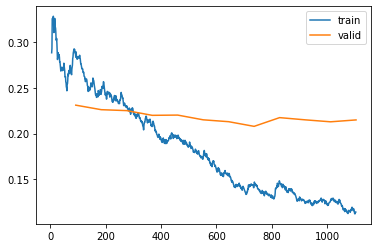

In [14]:
learn.recorder.plot_loss()

In [15]:
## Número de épocas

## Si en las épocas finales el modelo sigue mejorando, no se ha entrenado durante 
## el tiempo suficiente. Reentrenar el modelo desde cero y seleccionar el número
## de épocas donde previamente se obtuvieron los mejores resultados.

In [17]:
## Arquitecturas más profundas

## Un modelo más profundo puede dar un mejor loss de entrenamiento pero puede
## sufrir mas de sobreajuste porque tiene mas parámetros para ajustarse. En
## general un modelo mas grande tiene la habilidad de capturar mejor las
## relaciones en los datos como también capturar y memorizar los detalles
## específicos de las imágenes individuales.

### Desventajas de modelos profundos:
## - Requiere mas GPU. Se puede producir error oom. Es necesario bajar el
## tamaño de los lotes.
## - Toman bastante tiempo entrenar. Una técnica que acelera el entrenamiento
## es usar números menos precisos donde sea posible durante el entramiento 
## (mixed-precision training). ..> to_fp16()

In [18]:
from fastai.callback.fp16 import *

In [19]:
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)
# parámetro freeze_epochs permite establecer el número a entrenar con los pesos
# congelados. También, automáticamente selecciona el learning rate adecuado.

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.241405,0.351315,0.106225,02:16
1,0.568244,0.354747,0.109608,02:07
2,0.446612,0.334260,0.099459,02:07


epoch,train_loss,valid_loss,error_rate,time
0,0.253442,0.287775,0.090663,02:46
1,0.296353,0.358158,0.096076,02:42
2,0.249963,0.311330,0.083897,02:42
3,0.143347,0.248849,0.062923,02:41
4,0.080975,0.238631,0.064953,02:42
5,0.056102,0.236013,0.065629,02:42


In [20]:
## No se aprecia una mejora significativa con este modelo mas profundo. 
## Los modelos más grande no son necesariamente los mejores modelos para el caso
## particular. Probar primero con modelos mas pequeños antes de escalar